In [97]:
%load_ext oct2py.ipython
import networkx as nx
import numpy as np
from scipy.spatial.distance import pdist, squareform
import math
#import matplotlib.pyplot as plt

The oct2py.ipython extension is already loaded. To reload it, use:
  %reload_ext oct2py.ipython


In [4]:
@ - matrixszorzas

[[1,1],[1,1]] @ [[1,1],[1,1]] = [[2,2],[2,2]] 

* - elemenkenti szorzas

[[1,1],[1,1]] * [[1,1],[1,1]] = [[1,1],[1,1]]

SyntaxError: invalid syntax (<ipython-input-4-6bea01bb06a2>, line 1)

* Ctrl + shift + - tori el a cellat
* Shift + M = merge
* az ocatve-ban a ' a transzponalas
* az octave szigoruan megkulonbozteti a sor- es oszlopvektorokat
* az octave vektor/matrix objektumai jobban hasonlitanak a np.matrix-ra mint az array-re
* az octave-ban a ./ .* stb. mindig az elemenkenti muveleteket jelentik, mintha np.array-ekkel dolgoznal
* az octave 1-tol indexel, a Python 0-tol

In [5]:
G = nx.Graph()
G.add_edges_from([(0, 0), (2, 0), (1,1)])
A = nx.adjacency_matrix(G) # flow

In [11]:
coords = np.array([(0, 0), (2, 0),(1,1)])
d = pdist(coords)
D = squareform(pdist(coords)) # Dist

 # importance - number of users
N = np.matrix([1,1,1]).T
# binsize
max_dist = np.amax(D)
b = max_dist/4 # number of bins = 100

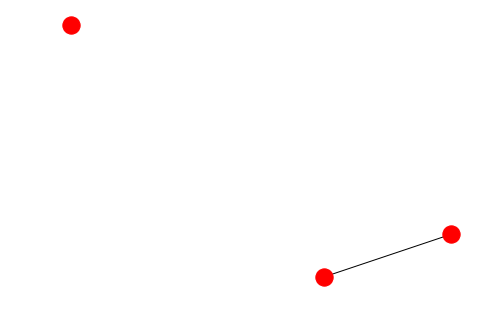

In [15]:
nx.draw(G)

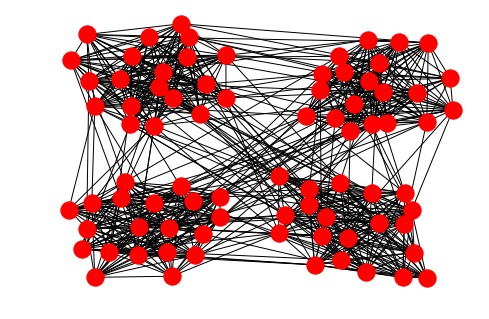

In [150]:
# Eszter gráf
# a good modular input matrix
p = np.ones((4,4))*0.05 + np.eye(4)*(1-3*0.05)
G = nx.stochastic_block_model([20]*4,p)
nx.draw(G)

In [151]:
# adjacency matrix
A = nx.adjacency_matrix(G)
# distance matrix
D = np.random.rand(len(G.nodes()),len(G.nodes()))
# importance
N = np.matrix([v for (k,v) in G.degree]).T
# binsize
b = 0.1

%%octave -i A,D,N,b -o Ms,Mg,Dfn,S,Q,n_it,N


% Flow,Dist,N,binsize - kellenek valami pofonegyszeru bemeneti adatok!

disp("Beginning of modularity function...");

number=size(Flow,1); %number of nodes in the system

nbox=2000; %number of bins, might need to increase it depending on your system and of level of coarse-graining

% intialisation of different vectors and matrices
DeterrenceFct=zeros(nbox,1);
normaDeterrence=zeros(nbox,1);
matrixdistance=zeros(number,number);
nullmodelGN=zeros(number,number);
nullmodelSpa=zeros(number,number);
Flow=Flow+Flow'; %symmetrised matrix (doesn't change the outcome of community detection (arXiv:0812.1770))
degree=sum(Flow); % degree/strength of the nodes
nullN=N*N'; % matrix of the importance of nodes
matrix=Flow./nullN; % normalised adjacency matrix

disp("Preparation done.")

disp("Deterrence function...")

%We first calculate the correlations as a function of distance

KERDES
for i=1:number
    disp(i)
    for ii=1:number
    
    % convert distances in binsize's units
    dist=1+ceil(Dist(i,ii)/binsize); 
    matrixdistance(i,ii)=dist;

    % weighted average for the deterrence function
    num=matrix(i,ii);
    DeterrenceFct(dist,1)=DeterrenceFct(dist,1)+num*N(i,1)*N(ii,1);
    normaDeterrence(dist,1)=normaDeterrence(dist,1)+N(i,1)*N(ii,1);
    end
    disp("Done.")
disp("Normalization...")
% normalisation of the deterrence function
for i=1:nbox
    disp(i)
    if(normaDeterrence(i,1)~=0)
        DeterrenceFct(i,1)=DeterrenceFct(i,1)/normaDeterrence(i,1);
    end
end

disp("Done.")

disp("Null modell...")

% copmutation of the randomised correlations (preserving space), spatial
% null-model
for i=1:number
    for ii=1:number
        nullmodelSpa(i,ii)=DeterrenceFct(matrixdistance(i,ii),1);
    end 
end

disp("Done.")

disp("Modularity calc...")
% the modularity matrix for the spatial null-model
ModularitySpa=Flow-nullN.*nullmodelSpa*sum(sum(Flow))/sum(sum(nullN.*nullmodelSpa));

% the modularity matrix for the GN null-model
nullmodelGN=degree'*degree/(sum(degree)); % Newman-Girvan null-model
ModularityGN=Flow-nullmodelGN;
disp("Done.")

In [145]:
%%octave -i A,D,N,b -o number,DeterrenceFct,normaDeterrence,matrixdistance,nullmodelGN,nullmodelSpa

addpath('/home/ubuntu/GenLouvain/')
addpath('/home/ubuntu/GenLouvain/private/')

function [number,DeterrenceFct,normaDeterrence,matrixdistance,nullmodelGN,nullmodelSpa]=ModularitySpaGN(Flow,Dist,N,binsize)

    % Flow: Adjacency matrix
    % Dist: Distance matrix between the nodes
    % N: a measure of the importance of a node (by default its strength: Dist=sum(Flow,1); for example)
    % binsize: size of the bins in the estimation of the deterrence function
    % (has to be tuned according to the problem)

    disp(size(Flow,1))
    number=size(Flow,1); %number of nodes in the system
    

    nbox=2000; %number of bins, might need to increase it depending on your system and of level of coarse-graining

    % intialisation of different vectors and matrices
    DeterrenceFct=zeros(nbox,1);
    normaDeterrence=zeros(nbox,1);

    matrixdistance=zeros(number,number);
    nullmodelGN=zeros(number,number);
    nullmodelSpa=zeros(number,number);
endfunction

Oct2PyError: Value "number" does not exist in Octave workspace

In [ ]:
    Flow=Flow+Flow'; %symmetrised matrix (doesn't change the outcome of community detection (arXiv:0812.1770))
    degree=sum(Flow); % degree/strength of the nodes
    nullN=N*N'; % matrix of the importance of nodes
    matrix=Flow./nullN; % normalised adjacency matrix

    %We first calculate the correlations as a function of distance

    for i=1:number
        for ii=1:number

        % convert distances in binsize's units
        dist=1+ceil(Dist(i,ii)/binsize); 
        matrixdistance(i,ii)=dist;

        % weighted average for the deterrence function
        num=matrix(i,ii);
        DeterrenceFct(dist,1)=DeterrenceFct(dist,1)+num*N(i,1)*N(ii,1);
        normaDeterrence(dist,1)=normaDeterrence(dist,1)+N(i,1)*N(ii,1);
        end 
    end

    % normalisation of the deterrence function
    for i=1:nbox
        if(normaDeterrence(i,1)~=0)
            DeterrenceFct(i,1)=DeterrenceFct(i,1)/normaDeterrence(i,1);
        end
    end

    % copmutation of the randomised correlations (preserving space), spatial
    % null-model
    for i=1:number
        for ii=1:number
            nullmodelSpa(i,ii)=DeterrenceFct(matrixdistance(i,ii),1);
        end 
    end

    % the modularity matrix for the spatial null-model
    ModularitySpa=Flow-nullN.*nullmodelSpa*sum(sum(Flow))/sum(sum(nullN.*nullmodelSpa));

    % the modularity matrix for the GN null-model
    nullmodelGN=degree'*degree/(sum(degree)); % Newman-Girvan null-model
    ModularityGN=Flow-nullmodelGN;
endfunction


[Ms,Mg,Dfn] = ModularitySpaGN(A,D,N,b);
[S,Q,n_it] = iterated_genlouvain(Mg);

In [153]:
%%octave -i A,D,N,b -o number

addpath('/home/ubuntu/GenLouvain/')
addpath('/home/ubuntu/GenLouvain/private/')

number=size(A,1); %number of nodes in the system

nbox=2000; %number of bins, might need to increase it depending on your system and of level of coarse-graining

% intialisation of different vectors and matrices
DeterrenceFct=zeros(nbox,1);
normaDeterrence=zeros(nbox,1);

In [154]:
number

80.0

In [143]:
%%octave -i A,D,N,b -o Ms,Mg,Dfn,S,Q,n_it,N

addpath('/home/ubuntu/GenLouvain/')
addpath('/home/ubuntu/GenLouvain/private/')

function [ModularitySpa,ModularityGN,DeterrenceFct]=ModularitySpaGN(Flow,Dist,N,binsize)

    % Flow: Adjacency matrix
    % Dist: Distance matrix between the nodes
    % N: a measure of the importance of a node (by default its strength: Dist=sum(Flow,1); for example)
    % binsize: size of the bins in the estimation of the deterrence function
    % (has to be tuned according to the problem)

    number=size(Flow,1); %number of nodes in the system
    disp('number:')
    disp(number)

    nbox=100; %number of bins, might need to increase it depending on your system and of level of coarse-graining

    % intialisation of different vectors and matrices
    DeterrenceFct=zeros(nbox,1);
    % disp('DeterrenceFct')
    % disp(DeterrenceFct)
    normaDeterrence=zeros(nbox,1);
    % disp('normaDeterrence')
    % disp(normaDeterrence)

    matrixdistance=zeros(number,number);
    % disp('matrixdistance')
    % disp(matrixdistance)
    nullmodelGN=zeros(number,number);
    % disp('nullmodelGN')
    % disp(nullmodelGN)
    nullmodelSpa=zeros(number,number);
    % disp('nullmodelSpa')
    % disp(nullmodelSpa)

    % INNEN NEM MEGY!!!
    disp(Flow)
    Flow=Flow+Flow'; %symmetrised matrix (doesn't change the outcome of community detection (arXiv:0812.1770))
    disp('Flow')
    disp(Flow)

   
    degree=sum(Flow); % degree/strength of the nodes
    nullN=N*N'; % matrix of the importance of nodes
    matrix=Flow./nullN; % normalised adjacency matrix

    %We first calculate the correlations as a function of distance

    for i=1:number
        for ii=1:number

        % convert distances in binsize's units
        dist=1+% ceil(Dist(i,ii)/binsize); 
        matrixdistance(i,ii)=dist;

        % weighted average for the deterrence function
        num=matrix[i][ii];
        DeterrenceFct(dist,1)=DeterrenceFct(dist,1)+num*N(i,1)*N(ii,1);
        normaDeterrence(dist,1)=normaDeterrence(dist,1)+N(i,1)*N(ii,1);
        end 
    end

    % normalisation of the deterrence function
    for i=1:nbox
        if(normaDeterrence(i,1)~=0)
            DeterrenceFct(i,1)=DeterrenceFct(i,1)/normaDeterrence(i,1);
        end
    end

    % copmutation of the randomised correlations (preserving space), spatial
    % null-model
    for i=1:number
        for ii=1:number
            nullmodelSpa(i,ii)=DeterrenceFct(matrixdistance(i,ii),1);
        end 
    end

    % the modularity matrix for the spatial null-model
    ModularitySpa=Flow-nullN.*nullmodelSpa*sum(sum(Flow))/sum(sum(nullN.*nullmodelSpa));

    % the modularity matrix for the GN null-model
    nullmodelGN=degree'*degree/(sum(degree)); % Newman-Girvan null-model
    ModularityGN=Flow-nullmodelGN;
endfunction


[Ms,Mg,Dfn] = ModularitySpaGN(A,D,N,b);
[S,Q,n_it] = iterated_genlouvain(Mg);

Oct2PyError: Octave evaluation error:
parse error:

  syntax error




Ide jon alulra a Python code

In [130]:
def SpaMod(A,D,N,b): # flow - adjacency matrix
    number=A.shape[0]
    # print('number')
    # print(number)
    nbox = 100 ## MODIFIED
    DeterrenceFct=np.zeros((nbox,1));
    # print('deterencefct')
    # print(DeterrenceFct)
    normaDeterrence=np.zeros((nbox,1));
    # print('normaDeterrence')
    # print(normaDeterrence)
    matrixdistance=np.zeros((number,number));
    # print('matrixdistance')
    # print(matrixdistance)
    nullmodelGN=np.zeros((number,number));
    # print('nullmodelGN')
    # print(nullmodelGN)
    nullmodelSpa=np.zeros((number,number));  
    # print('nullmodelSpa')
    # print(nullmodelSpa)
    
    A = A + A.T # felesleges?? KERDES
    
    degree = A.sum(axis=0)
    # print(degree)
    nullN = N * N.T
    # print(nullN)
    matrix = np.divide(A,N) ## KERDESES, HOGY JO-e
    print(matrix[0])
    
    for i in range(number):
        print(i)
        for ii in range(number):
            # convert distances in binsize's units
            dist = 1 + math.ceil(D[i][ii]/b); ##KELL + 1???
            matrixdistance[i][ii]=dist;

            # weighted average for the deterrence function
            num = matrix[i][ii];
            print(DeterrenceFct)
            DeterrenceFct[dist][0]=DeterrenceFct[dist][0]+num*N[i][0]*N[ii][0]; ## KERDES deterence a matrix??, []-kell??
            normaDeterrence[dist][0]=normaDeterrencef[dist][0]+N[i][0]*N[ii][0];
            end
    
    print("Normalization...")
    # normalisation of the deterrence function
    for i in range(nbox):
        if(normaDeterrence[i][0]!=0):
            DeterrenceFct[i][0]=DeterrenceFct[i][0]/normaDeterrence[i][0];
        end
    end
    print("Done.")
    
    print("Null modell...")
    # copmutation of the randomised correlations (preserving space), spatial
    # null-model
    for i in range(number):
        for ii in range(number):
            nullmodelSpa[i][ii]=DeterrenceFct[matrixdistance(i,ii)][0];
        end 
    end
    print("Done.")
    
    print("Modularity calc...")
    # the modularity matrix for the spatial null-model
    ModularitySpa=A-np.multiply(nullN, nullmodelSpa*A.sum()/np.multiply(nullN,nullmodelSpa).sum());
    
    # the modularity matrix for the GN null-model
    nullmodelGN = degree*degree/(sum(degree)); # Newman-Girvan null-model
    ModularityGN=Flow-nullmodelGN;
    print("Done.")

In [131]:
SpaMod(A,D,N,b)

[<80x80 sparse matrix of type '<class 'numpy.float64'>'
	with 1606 stored elements in Compressed Sparse Row format>]
0


ValueError: setting an array element with a sequence.

In [50]:
1!=2

True

In [24]:
A = A + A.T 

In [44]:
np.matrix([2,1])

matrix([[2, 1]])

In [56]:
B = np.matrix([[1,2,3],[1,2,4]])
B

matrix([[1, 2, 3],
        [1, 2, 4]])

2

In [57]:
C = np.matrix([[1,3,6],[0.5,0.2,0.1]])
C

matrix([[1. , 3. , 6. ],
        [0.5, 0.2, 0.1]])

In [37]:
B.sum(axis=0)

matrix([[2, 4, 7]])

In [53]:
B.sum()

13

In [55]:
np.multiply(B,C)

matrix([[ 1. ,  6. , 18. ],
        [ 0.5,  0.4,  0.4]])

In [59]:
B-C

matrix([[ 0. , -1. , -3. ],
        [ 0.5,  1.8,  3.9]])